# Pandas and matplotlib examples with financial data

You can download financial data from banks with a good online presence.

For example, at chase.com, you can download up to 24 months of historical credit
transaction data.

With that data, you can run various reports using Pandas and matplotlib to gain insights
into your spending.  Below, I show some reports and pie charts using data from chase.com
downloaded as CSV format.  If you use a different bank, the fields may be different -- so
adjust the code as needed.

NOTE: Actual charts are omitted in most cases to avoid exposing too much
info about the donor's financial data.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
import datetime
import glob
import os

In [315]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "chase_all/*.CSV"))))

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 117
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  2619 non-null   object 
 1   Post Date         2619 non-null   object 
 2   Description       2619 non-null   object 
 3   Category          2595 non-null   object 
 4   Type              2619 non-null   object 
 5   Amount            2619 non-null   float64
 6   Memo              0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 163.7+ KB


In [ ]:
# Use Transaction Date because this was when the charge was made.
# The Post Date shows when the transaction was actually posted.
# But most of us are more interested in when we spent money and
# not when the bank found out about it.
#
df.set_index('Transaction Date')

In [318]:
# Since the memo column is all NaN, remove it.
# Axis = 0 for rows.
# Axis = 1 for columns.
#
df = df.drop('Memo', axis=1)

In [319]:
# Rename the Transaction Date for easier typing.
#
df.rename(columns={'Transaction Date': 'Date'}, inplace=True)

In [320]:
# Convert the Date field to an actual date so you can compare.
#
df.Date = pd.to_datetime(df.Date)

In [ ]:
# Show transactions > $100.00
# Note that spending shows as negative numbers.
#
df[df['Amount'] < -100.00]

In [ ]:
# Transactions after Dec 1, 2020 sorted by Date column.
#
df[df['Date'] > "2020/12/01"].sort_values(by="Date")

In [ ]:
# Group be Category first, Date, then Description.
#
df.groupby(by=['Category', 'Date', 'Description']).sum()

In [84]:
pd.set_option('display.max_rows', 500)

In [ ]:
# Get all Automotive spending grouped by Date, then Description.
#
df[df['Category'] == 'Automotive'].groupby(by=['Date', 'Description']).sum()

In [ ]:
# Get all Automotive grouped by Description, then sum of each.
# Use it to see things like: "We spent total of xxxx.xx at vendorX for 2020.
#
df[df['Category'] == 'Automotive'].groupby(by=['Description'])['Amount'].sum()

In [ ]:
# Calculate the sum of all Automotive purchases.
#
df[df['Category'] == 'Automotive']['Amount'].sum()

In [ ]:
# Get all Shopping grouped by Date, then Description.
#
df[df['Category'] == 'Shopping'].groupby(by=['Description']).sum()

In [ ]:
# Calculate the sum of all Shopping purchases.
#
df[df['Category'] == 'Shopping']['Amount'].sum()

In [ ]:
df.groupby(by='Category').sum()

<AxesSubplot:ylabel='None'>

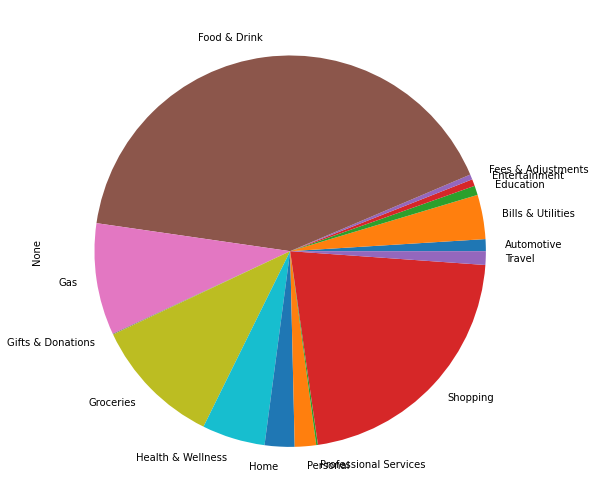

In [172]:
# Categories and number of transactions each.
#
df.groupby(['Category']).size()

# Plot number of transaction grouped by category
#
sp = df.groupby(['Category']).size().plot
sp.pie(figsize=(9,9))

In [ ]:
# Categories and number of transactions each.
#
ss = df.groupby(['Category'],as_index=False).sum()

# Plot number of transaction grouped by category
#
#sp = df.groupby(['Category']).sum().plot
#sp.pie(figsize=(9,9))

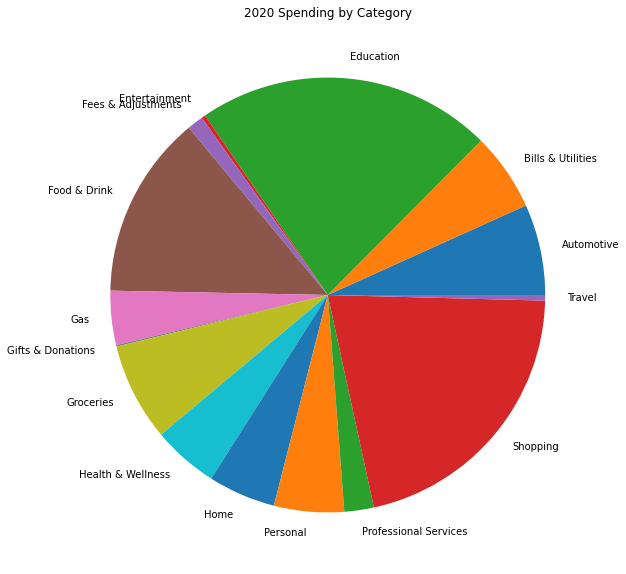

Total Spending: $-68,200.00


In [206]:
# Summed by category
#
fr = df.groupby(by='Category', as_index=False).sum()

# Plot categories and sums.
#
plt.pie(fr['Amount'].abs(), labels=fr['Category'].tolist())
plt.title("2020 Spending by Category")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Print total
#
sum = fr['Amount'].sum()

# Fake data for some output
#
sum = -68200.00

print(f"Total Spending: ${sum:,.2f}")

In [ ]:
# Show transactions and remove Fees and Adjustments.
#
df[df['Category'] != 'Fees & Adjustments'].groupby(by='Category', as_index=False).sum()

In [ ]:
# Summed by category
#
fr = df.groupby(by='Category', as_index=False).sum()

# Plot categories and sums.
#
plt.pie(fr['Amount'].abs(), labels=fr['Category'].tolist())
plt.title("2020 Spending by Category")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Print total
#
print(f"Total Spending: ${fr['Amount'].sum():,.2f}")

In [ ]:
# Indexing using a boolean.
# Get the Shopping transactions on a particular date.
#
df[ (df['Date'] == '2019/12/12') & (df['Category'] == 'Shopping')]

In [ ]:
# Get transactions with category equal to one of two things.
#
df [ df['Category'].isin(['Automotive', 'Education']) ]

In [ ]:
df [ df['Category'].isin(['Automotive', 'Education']) ].groupby(by=['Category']).sum()

In [ ]:
# Get both columns by using as_index=False.
#
df [ df['Category'].isin(['Automotive', 'Education']) ].groupby(by=['Category'], as_index=False).sum()

In [ ]:
# Show sums by Category Sorted by Amount
#
df.groupby(by='Category', as_index=False).sum().sort_values('Amount')

In [ ]:
# Show sums by Category Sorted by Amount (but just top 10)
#
df.groupby(by='Category', as_index=False).sum().sort_values('Amount').iloc[:10]

In [ ]:
# Summed by category (for top m through n).
# Sometimes the top items are big and obscure the smaller ones
# so make it so we can filter them out.
#
m=3
n=100
fr = df.groupby(by='Category', as_index=False).sum().sort_values('Amount').iloc[m:n]

# Make some nice labels with category and $(x,xxx.xx).
#
labels = []
for x,y in zip(fr['Category'].tolist(),fr['Amount'].tolist()):
    labels.append(f"{x} (${y:8,.2f})")
    
# Plot categories and sums.
#
plt.pie(fr['Amount'].abs(), labels=labels)
plt.title(f"2020 Top {m}-{n} Spending by Category")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Print total
#
print(f"Total Top {m}-{n} Spending: ${fr['Amount'].sum():,.2f}")

In [ ]:
df[df['Category'] == "Education"]['Amount'].sum()

In [ ]:
df[df['Description'].str.contains('University') ]